In [315]:
import numpy as np
import matplotlib.pyplot as mlt
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_validate, cross_val_predict
from sklearn.metrics import confusion_matrix,make_scorer
from sklearn.neighbors import KNeighborsClassifier


In [316]:
dataset = pd.read_csv('/Users/himanipatel/Downloads/archive/chipotle_stores.csv')

dataset.head()

In [317]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2629 entries, 0 to 2628
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   state      2629 non-null   object 
 1   location   2629 non-null   object 
 2   address    2629 non-null   object 
 3   latitude   2629 non-null   float64
 4   longitude  2629 non-null   float64
dtypes: float64(2), object(3)
memory usage: 102.8+ KB


In [318]:
dataset.describe()

,latitude,longitude
count,2629.000000,2629.000000
mean,37.515979,-92.490287
std,4.749089,16.578616
min,25.479009,-124.183611
25%,33.876535,-105.095673
50%,38.898082,-87.180851
75%,40.813125,-78.879958
max,48.785206,-68.753750


In [319]:
A=dataset.drop(['address'],axis=1)
B=dataset['state'].copy()

In [320]:
A.head()

,state,location,latitude,longitude
0,Alabama,Auburn,32.606813,-85.487328
1,Alabama,Birmingham,33.509721,-86.802756
2,Alabama,Birmingham,33.595581,-86.647437
3,Alabama,Birmingham,33.422582,-86.698279
4,Alabama,Cullman,34.154134,-86.841220


In [321]:
B.head()

0    Alabama
1    Alabama
2    Alabama
3    Alabama
4    Alabama
Name: state, dtype: object

In [322]:
A["latitude"]=A["latitude"].fillna(A["latitude"].mean())

In [323]:
A["longitude"]=A["longitude"].fillna(A["longitude"].mode()[0])

In [324]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2629 entries, 0 to 2628
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   state      2629 non-null   object 
 1   location   2629 non-null   object 
 2   latitude   2629 non-null   float64
 3   longitude  2629 non-null   float64
dtypes: float64(2), object(2)
memory usage: 82.3+ KB


In [325]:
##feature scaling

num_col = A._get_numeric_data().columns
col=A.columns
cat_col=list(set(col) - set(num_col))

for col in cat_col:
    le = preprocessing.LabelEncoder()
    A[col] = le.fit_transform(A[col])
A.shape

(2629, 4)

In [326]:
##splitting the dataset into the training set and the test set

A_train, A_test, B_train, B_test = train_test_split(A, B, test_size = 0.30, random_state = 0)

In [327]:
sc = StandardScaler()
A_train = sc.fit_transform(A_train)
A_test = sc.transform(A_test)

In [328]:
##training the Random Forest model on the training set

rndm_frst=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rndm_frst.fit(A_train , B_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [329]:
##predecting the test set results
B_rndm = rndm_frst.predict(A_test)

In [330]:
##making the confusion matrix

cm = confusion_matrix(B_test, B_rndm)
print(cm)

[[ 7  0  0 ...  0  0  0]
 [ 0 22  0 ...  0  0  0]
 [ 0  0  1 ...  0  0  0]
 ...
 [ 0  0  0 ...  2  0  0]
 [ 0  0  0 ...  0  7  0]
 [ 0  0  0 ...  0  0  0]]


In [331]:

def tn(B_test,B_rndm): return confusion_matrix(B_test,B_rndm)[0,0]
def tn(B_test,B_rndm): return confusion_matrix(B_test,B_rndm)[0,1]
def tn(B_test,B_rndm): return confusion_matrix(B_test,B_rndm)[1,1]
def tn(B_test,B_rndm): return confusion_matrix(B_test,B_rndm)[1,0]
def tpr(B_test,B_rndm): 
    no_tp = confusion_matrix(B_test,B_rndm)[1,1]
    no_fn = confusion_matrix(B_test,B_rndm)[1,0]
    return round((no_tp / (no_tp + no_fn)),2)
def tnr(B_test,B_rndm): 
    no_tn = confusion_matrix(B_test,B_rndm)[0,0]
    no_fp = confusion_matrix(B_test,B_rndm)[0,1]
    return round((no_tn / (no_tn + no_fp)),2)
def fpr(B_test,B_rndm): 
    no_tn = confusion_matrix(B_test,B_rndm)[0,0]
    no_fp = confusion_matrix(B_test,B_rndm)[0,1]
    return round((no_fp / (no_tn + no_fp)),2)
def fnr(B_test,B_rndm): 
    no_tp = confusion_matrix(B_test,B_rndm)[1,1]
    no_fn = confusion_matrix(B_test,B_rndm)[1,0]
    return round((no_fn / (no_tp + no_fn)),2)
def Recall(B_test,B_rndm):
    no_tp = confusion_matrix(B_test,B_rndm)[1,1]
    no_fn = confusion_matrix(B_test,B_rndm)[1,0]
    return round((no_tp / (no_tp + no_fn)),2)
def Precision(B_test,B_rndm):
    no_tp = confusion_matrix(B_test,B_rndm)[1,1]
    no_fp = confusion_matrix(B_test,B_rndm)[0,1]
    return round((no_tp / (no_tp + no_fp)),2)
def F1Score(B_test,B_rndm):
    no_tp = confusion_matrix(B_test,B_rndm)[1,1]
    no_fp = confusion_matrix(B_test,B_rndm)[0,1]
    no_fn = confusion_matrix(B_test,B_rndm)[1,0]
    return round(((2*no_tp) / ((2*no_tp) + no_fp+no_fn)),2)
def Accuracy(B_test,B_rndm):
    no_tn = confusion_matrix(B_test,B_rndm)[0,0]
    no_fp = confusion_matrix(B_test,B_rndm)[0,1]
    no_tp = confusion_matrix(B_test,B_rndm)[1,1]
    no_fn = confusion_matrix(B_test,B_rndm)[1,0]
    return round(((no_tp + no_tn) / (no_tp + no_fp + no_fn + no_tn)),2)
def Error(B_test,B_rndm):
    no_tn = confusion_matrix(B_test,B_rndm)[0,0]
    no_fp = confusion_matrix(B_test,B_rndm)[0,1]
    no_tp = confusion_matrix(B_test,B_rndm)[1,1]
    no_fn = confusion_matrix(B_test,B_rndm)[1,0]
    return round(((no_fp + no_fn) / (no_tp + no_fp + no_fn + no_tn)),2)
def BACC(B_test,B_rndm):
    no_tn = confusion_matrix(B_test,B_rndm)[0,0]
    no_fp = confusion_matrix(B_test,B_rndm)[0,1]
    no_tp = confusion_matrix(B_test,B_rndm)[1,1]
    no_fn = confusion_matrix(B_test,B_rndm)[1,0]
    return round(0.5*((no_tp / (no_tp + no_fn))+(no_tn / (no_fp + no_tn))),2)
def TSS(B_test,B_rndm):
    no_tn = confusion_matrix(B_test,B_rndm)[0,0]
    no_fp = confusion_matrix(B_test,B_rndm)[0,1]
    no_tp = confusion_matrix(B_test,B_rndm)[1,1]
    no_fn = confusion_matrix(B_test,B_rndm)[1,0]
    return round((no_tp / (no_tp + no_fn))-(no_fp / (no_fp + no_tn)),2)
def HSS(B_test,B_rndm):
    no_tn = confusion_matrix(B_test,B_rndm)[0,0]
    no_fp = confusion_matrix(B_test,B_rndm)[0,1]
    no_tp = confusion_matrix(B_test,B_rndm)[1,1]
    no_fn = confusion_matrix(B_test,B_rndm)[1,0]
    return round((2*((no_tp * no_tn)-(no_fp * no_fn)))/(((no_tp + no_fn)*(no_fn + no_tn))+((no_tp + no_fp)*(no_fp + no_tn))),2)

    

#def tpr(ans_tp,ans_fn): return ans_tp/(ans_tp+ans_fn)
scoring = {'tp': make_scorer(tp),'tn': make_scorer(tn),'fp': make_scorer(fp),'fn': make_scorer(fn),'tpr': make_scorer(tpr),
           'tnr':make_scorer(tnr),'fpr':make_scorer(fpr),'fnr':make_scorer(fnr),'recall':make_scorer(Recall),
           'precision':make_scorer(Precision),'F1Score':make_scorer(F1Score),
           'Accuracy':make_scorer(Accuracy),'Error':make_scorer(Error),'BACC':make_scorer(BACC),'TSS':make_scorer(TSS),
           'HSS':make_scorer(HSS)}

In [332]:
## Splits the dataset in the Kfolds
cv = KFold(n_splits=10,random_state=1,shuffle=True)
scores = cross_validate(rndm_frst,A_train,B_train,scoring = scoring,cv=cv)
print(scores)

{'fit_time': array([0.06250978, 0.04787016, 0.050313  , 0.05007696, 0.04876494,
       0.05768609, 0.04839611, 0.05898786, 0.04860282, 0.04801989]), 'score_time': array([0.04194713, 0.03874397, 0.05091214, 0.03914595, 0.04712987,
       0.03983879, 0.03873086, 0.04940701, 0.03831911, 0.03856111]), 'test_tp': array([28,  3,  5,  1, 29,  9, 33,  7,  1,  8]), 'test_tn': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 'test_fp': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 'test_fn': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 'test_tpr': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'test_tnr': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'test_fpr': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'test_fnr': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'test_recall': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'test_precision': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'test_F1Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'test_Accuracy': array([1., 1., 1., 1., 1., 1., 1.,

In [333]:
column = ['Fold 1','Fold 2','Fold 3','Fold 4','Fold 5','Fold 6','Fold 7','Fold 8','Fold 9','Fold 10']
row = ['TP','TN','FP','FN','TPR','TNR','FPR','FNR','Recall','Precision','Error','BACC','TSS','HSS','F1 Score','Accuracy']
 

data_rf = [value for value in scores.values()]
data_rf = data_rf[3:]

In [334]:
for i in range(len(data_rf)):
    avg = round(sum(data_rf[i])/len(data_rf[i]),2)
    temp = list(data_rf[i])
    temp.append(avg)
    data_rf[i]=temp
print(data_rf)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]


<ipython-input-335-0888d1b9131d>:12: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig3.tight_layout()


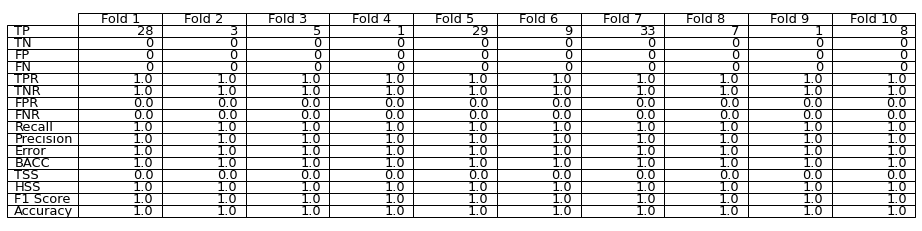

In [335]:
import matplotlib.pyplot as plt
fig3,ax3 = mlt.subplots()


fig3.patch.set_visible(False)
ax3.axis('off')


the_table3=ax3.table(cellText=data_svm, rowLabels=row, colLabels=column,loc='center',colWidths=[0.25 for x in column])
the_table3.auto_set_font_size(False)
the_table3.set_fontsize(13)
fig3.tight_layout()
plt.show()

In [336]:
###SVM

In [337]:
from sklearn.svm import SVC
from sklearn import svm
svm_clf=SVC(kernel='linear',random_state=0)
svm_clf.fit(A_train,B_train)

SVC(kernel='linear', random_state=0)

In [338]:
B_pred = classifier.predict(A_test)

In [339]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(B_test, B_pred)
print(cm)

[[ 7  0  0 ...  0  0  0]
 [ 0 22  0 ...  0  0  0]
 [ 0  0  1 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  7  0]
 [ 0  0  0 ...  0  0  0]]


In [340]:
#Apply model on test data
y_pred_test=svm_clf.predict(A_test)
y_pred_test

array(['Pennsylvania', 'California', 'Virginia', 'Maryland', 'Oklahoma',
       'Washington', 'California', 'Texas', 'Illinois', 'Pennsylvania',
       'California', 'Ohio', 'Florida', 'Missouri', 'Pennsylvania',
       'New York', 'Pennsylvania', 'Ohio', 'Virginia', 'Florida',
       'Illinois', 'Minnesota', 'Illinois', 'Texas', 'California',
       'Florida', 'Indiana', 'Kansas', 'Texas', 'Missouri', 'Maryland',
       'Texas', 'Texas', 'Illinois', 'Minnesota', 'New York',
       'Washington', 'South Carolina', 'Pennsylvania', 'Washington DC',
       'Massachusetts', 'Texas', 'Colorado', 'Arizona', 'Ohio',
       'California', 'Minnesota', 'Texas', 'Maryland', 'Pennsylvania',
       'Ohio', 'Ohio', 'Ohio', 'Florida', 'Florida', 'Virginia',
       'Missouri', 'California', 'Texas', 'Texas', 'California',
       'Florida', 'Texas', 'Maryland', 'Washington', 'California',
       'California', 'Rhode Island', 'Oregon', 'Missouri', 'California',
       'California', 'California', 'Connect

In [341]:
#Accuracy calculation
from sklearn import metrics
metrics.accuracy_score(B_test,B_test)

1.0

In [342]:
#Create confusion matrix
conf=metrics.confusion_matrix(B_test,B_test)
conf

array([[ 7,  0,  0, ...,  0,  0,  0],
       [ 0, 22,  0, ...,  0,  0,  0],
       [ 0,  0,  1, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  2,  0,  0],
       [ 0,  0,  0, ...,  0,  7,  0],
       [ 0,  0,  0, ...,  0,  0,  1]])

In [343]:
#Precision, Recall, FScore
pr_rcl=metrics.precision_recall_fscore_support(B_test,B_test,average='weighted')
pr_rcl

(1.0, 1.0, 1.0, None)

In [344]:
print(scores.values)

<built-in method values of dict object at 0x7f93a63b8880>


In [345]:
data_svm = [value for value in scores.values()]
data_svm = data_svm[2:]

<ipython-input-346-1e0f9bd62bb1>:11: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig3.tight_layout()


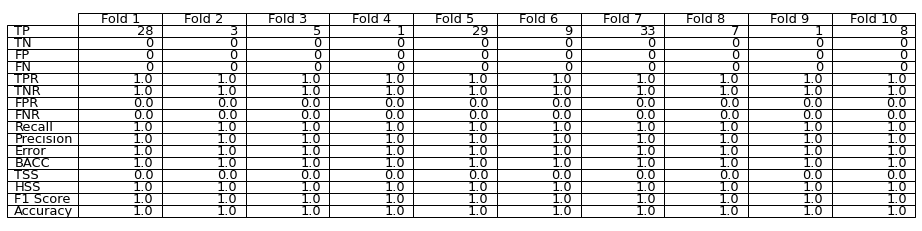

In [346]:
fig3,ax3 = mlt.subplots()


fig3.patch.set_visible(False)
ax3.axis('off')


the_table3=ax3.table(cellText=data_svm, rowLabels=row, colLabels=column,loc='center',colWidths=[0.25 for x in column])
the_table3.auto_set_font_size(False)
the_table3.set_fontsize(13)
fig3.tight_layout()
plt.show()

In [92]:
##LSTM

In [290]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense,RNN,LSTM,Activation,Dropout
from keras.models import Sequential

In [291]:
A.shape

(2629, 4)

In [292]:
B.shape

(2629,)

In [293]:
A_train = np.reshape(A_train, (A_train.shape[0],A_train.shape[1],1))

In [305]:
A_train = np.reshape(A_train, (A_train.shape[0],A_train.shape[1],1))

In [306]:
model = Sequential() # initializing model

model.add(LSTM(units=60, return_sequences=False, input_shape=(A_train.shape[1],1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(A_train, B_train, epochs=101, batch_size=4000,validation_split=0.3)

Epoch 1/101


UnimplementedError:  Cast string to float is not supported
	 [[node binary_crossentropy/Cast
 (defined at /Users/himanipatel/opt/anaconda3/lib/python3.8/site-packages/keras/losses.py:1797)
]] [Op:__inference_train_function_9674]

Errors may have originated from an input operation.
Input Source operations connected to node binary_crossentropy/Cast:
In[0] IteratorGetNext (defined at /Users/himanipatel/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:866)

Operation defined at: (most recent call last)
>>>   File "/Users/himanipatel/opt/anaconda3/lib/python3.8/runpy.py", line 194, in _run_module_as_main
>>>     return _run_code(code, main_globals, None,
>>> 
>>>   File "/Users/himanipatel/opt/anaconda3/lib/python3.8/runpy.py", line 87, in _run_code
>>>     exec(code, run_globals)
>>> 
>>>   File "/Users/himanipatel/opt/anaconda3/lib/python3.8/site-packages/ipykernel_launcher.py", line 16, in <module>
>>>     app.launch_new_instance()
>>> 
>>>   File "/Users/himanipatel/opt/anaconda3/lib/python3.8/site-packages/traitlets/config/application.py", line 845, in launch_instance
>>>     app.start()
>>> 
>>>   File "/Users/himanipatel/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 612, in start
>>>     self.io_loop.start()
>>> 
>>>   File "/Users/himanipatel/opt/anaconda3/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 199, in start
>>>     self.asyncio_loop.run_forever()
>>> 
>>>   File "/Users/himanipatel/opt/anaconda3/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
>>>     self._run_once()
>>> 
>>>   File "/Users/himanipatel/opt/anaconda3/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
>>>     handle._run()
>>> 
>>>   File "/Users/himanipatel/opt/anaconda3/lib/python3.8/asyncio/events.py", line 81, in _run
>>>     self._context.run(self._callback, *self._args)
>>> 
>>>   File "/Users/himanipatel/opt/anaconda3/lib/python3.8/site-packages/tornado/ioloop.py", line 688, in <lambda>
>>>     lambda f: self._run_callback(functools.partial(callback, future))
>>> 
>>>   File "/Users/himanipatel/opt/anaconda3/lib/python3.8/site-packages/tornado/ioloop.py", line 741, in _run_callback
>>>     ret = callback()
>>> 
>>>   File "/Users/himanipatel/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 814, in inner
>>>     self.ctx_run(self.run)
>>> 
>>>   File "/Users/himanipatel/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 775, in run
>>>     yielded = self.gen.send(value)
>>> 
>>>   File "/Users/himanipatel/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 365, in process_one
>>>     yield gen.maybe_future(dispatch(*args))
>>> 
>>>   File "/Users/himanipatel/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
>>>     yielded = ctx_run(next, result)
>>> 
>>>   File "/Users/himanipatel/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 268, in dispatch_shell
>>>     yield gen.maybe_future(handler(stream, idents, msg))
>>> 
>>>   File "/Users/himanipatel/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
>>>     yielded = ctx_run(next, result)
>>> 
>>>   File "/Users/himanipatel/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 543, in execute_request
>>>     self.do_execute(
>>> 
>>>   File "/Users/himanipatel/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
>>>     yielded = ctx_run(next, result)
>>> 
>>>   File "/Users/himanipatel/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 306, in do_execute
>>>     res = shell.run_cell(code, store_history=store_history, silent=silent)
>>> 
>>>   File "/Users/himanipatel/opt/anaconda3/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
>>>     return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
>>> 
>>>   File "/Users/himanipatel/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2894, in run_cell
>>>     result = self._run_cell(
>>> 
>>>   File "/Users/himanipatel/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2940, in _run_cell
>>>     return runner(coro)
>>> 
>>>   File "/Users/himanipatel/opt/anaconda3/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
>>>     coro.send(None)
>>> 
>>>   File "/Users/himanipatel/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3165, in run_cell_async
>>>     has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
>>> 
>>>   File "/Users/himanipatel/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3357, in run_ast_nodes
>>>     if (await self.run_code(code, result,  async_=asy)):
>>> 
>>>   File "/Users/himanipatel/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3437, in run_code
>>>     exec(code_obj, self.user_global_ns, self.user_ns)
>>> 
>>>   File "<ipython-input-306-91f8e80d90bd>", line 6, in <module>
>>>     model.fit(A_train, B_train, epochs=101, batch_size=4000,validation_split=0.3)
>>> 
>>>   File "/Users/himanipatel/opt/anaconda3/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "/Users/himanipatel/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1216, in fit
>>>     tmp_logs = self.train_function(iterator)
>>> 
>>>   File "/Users/himanipatel/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 878, in train_function
>>>     return step_function(self, iterator)
>>> 
>>>   File "/Users/himanipatel/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 867, in step_function
>>>     outputs = model.distribute_strategy.run(run_step, args=(data,))
>>> 
>>>   File "/Users/himanipatel/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 860, in run_step
>>>     outputs = model.train_step(data)
>>> 
>>>   File "/Users/himanipatel/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 809, in train_step
>>>     loss = self.compiled_loss(
>>> 
>>>   File "/Users/himanipatel/opt/anaconda3/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 201, in __call__
>>>     loss_value = loss_obj(y_t, y_p, sample_weight=sw)
>>> 
>>>   File "/Users/himanipatel/opt/anaconda3/lib/python3.8/site-packages/keras/losses.py", line 141, in __call__
>>>     losses = call_fn(y_true, y_pred)
>>> 
>>>   File "/Users/himanipatel/opt/anaconda3/lib/python3.8/site-packages/keras/losses.py", line 245, in call
>>>     return ag_fn(y_true, y_pred, **self._fn_kwargs)
>>> 
>>>   File "/Users/himanipatel/opt/anaconda3/lib/python3.8/site-packages/keras/losses.py", line 1797, in binary_crossentropy
>>>     y_true = tf.cast(y_true, y_pred.dtype)
>>> 